## Deep Learning Model Explainations Powered by [LIME](https://github.com/marcotcr/lime)

In [27]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage.segmentation import mark_boundaries
from keras.applications.vgg16 import VGG16

In [28]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
inet_model = inc_net.InceptionV3()

In [41]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

('n02328150', 'Angora', 0.48835042)
('n03633091', 'ladle', 0.047829345)
('n03482405', 'hamper', 0.03052998)
('n04074963', 'remote_control', 0.020550655)
('n03942813', 'ping-pong_ball', 0.01629648)


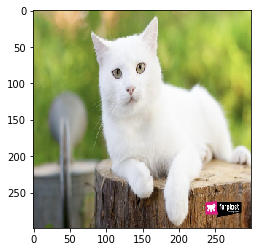

In [42]:
catImg = transform_img_fn(['cat.jpg'])

plt.imshow(catImg[0] / 2 + 0.5)
catPreds = inet_model.predict(catImg)

for x in decode_predictions(catPreds)[0]:
    print(x)

('n02111889', 'Samoyed', 0.83269906)
('n02109961', 'Eskimo_dog', 0.039262317)
('n02110063', 'malamute', 0.014614169)
('n02110185', 'Siberian_husky', 0.0059931176)
('n02114548', 'white_wolf', 0.0032785456)


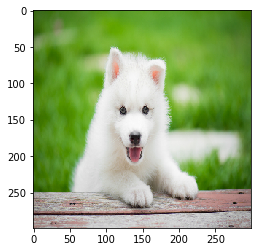

In [43]:
dogImg = transform_img_fn(['dog.jpg'])

plt.imshow(dogImg[0] / 2 + 0.5)
dogPreds = inet_model.predict(dogImg)

for x in decode_predictions(dogPreds)[0]:
    print(x)

In [44]:
explainer = lime_image.LimeImageExplainer()

In [45]:
%%time
catExplanation = explainer.explain_instance(catImg[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

Wall time: 1min 57s


In [46]:
%%time
dogExplanation = explainer.explain_instance(dogImg[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

Wall time: 1min 55s


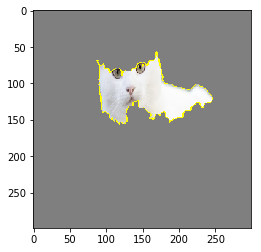

In [47]:
temp, mask = catExplanation.get_image_and_mask(catExplanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

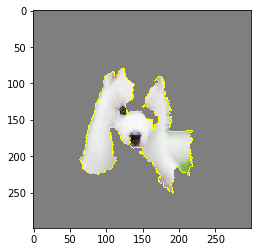

In [48]:
temp, mask = dogExplanation.get_image_and_mask(dogExplanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

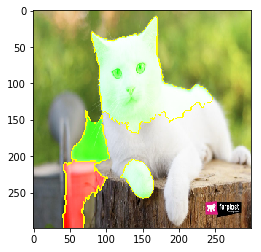

In [49]:
temp, mask = catExplanation.get_image_and_mask(catExplanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

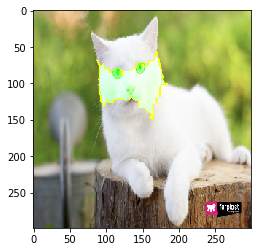

In [50]:
temp, mask = catExplanation.get_image_and_mask(catExplanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.05)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

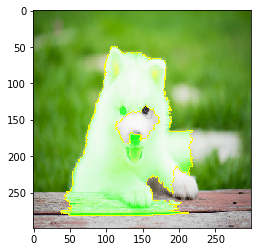

In [51]:
temp, mask = dogExplanation.get_image_and_mask(dogExplanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

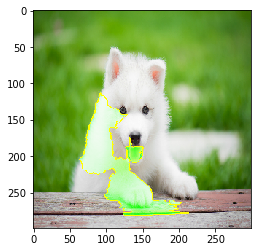

In [52]:
temp, mask = dogExplanation.get_image_and_mask(dogExplanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))